## Linear Regression

(0.0, 6.0, 0.0, 20.0)

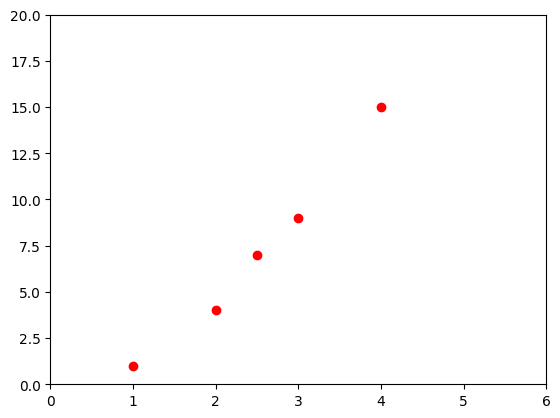

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

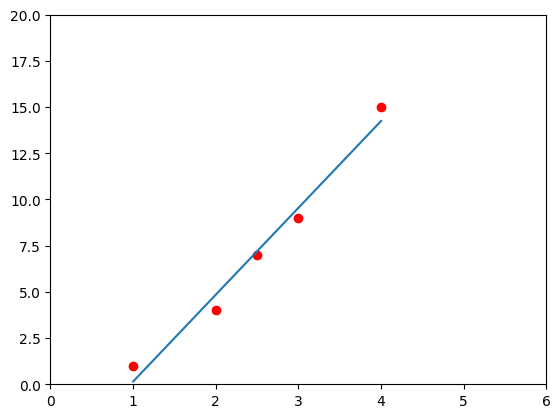

In [2]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

In [3]:
# Load dataset.
import pandas as pd
df_train = pd.read_csv("/Users/abhishek/Codes/Resources/Data/train.csv") # training data
df_test = pd.read_csv("/Users/abhishek/Codes/Resources/Data/eval.csv") # testing data


In [4]:
df_train.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [5]:
from sklearn.preprocessing import  LabelEncoder
encoder = LabelEncoder()
for col in ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']:
    df_train[col] = encoder.fit_transform(df_train[col])

In [6]:
df_train.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,1,22.0,1,0,7.2500,2,7,2,0
1,1,0,38.0,1,0,71.2833,0,2,0,0
2,1,0,26.0,0,0,7.9250,2,7,2,1
3,1,0,35.0,1,0,53.1000,0,2,2,0
4,0,1,28.0,0,0,8.4583,2,7,1,1


In [7]:
y = df_train.pop('survived')

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_train,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(X_train)
x_test_scaled = scalar.transform(X_test)

### ANN

In [10]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

/Users/abhishek/Codes/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [13]:
import time
tic = time.time()
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
print(":::::")
print(time.time()-tic)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.0089 - val_loss: 0.5675
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8094 - val_loss: 0.4594
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4489 - val_loss: 0.3022
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3393 - val_loss: 0.3147
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3345 - val_loss: 0.2728
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3030 - val_loss: 0.2671
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2831 - val_loss: 0.2608
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3022 - val_loss: 0.2539
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2835 - val_loss: 0.2318
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2522 - val_loss: 0.2467
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2627 - val_loss: 0.2510
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3

In [14]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1595
Test Loss (MSE): 0.16745129227638245


In [15]:
predictions = model.predict(X_test)
print("Predictions:", predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Predictions: [[ 0.03452513]
 [ 0.13251537]
 [ 0.14871943]
 [ 0.14611447]
 [-0.20769069]
 [-0.17095834]
 [ 0.81006825]
 [ 0.1303468 ]
 [ 0.2012159 ]
 [ 0.6888274 ]
 [ 0.13391367]
 [ 0.517689  ]
 [ 0.14775541]
 [ 0.1604433 ]
 [ 0.14513442]
 [ 0.68163556]
 [ 0.6994863 ]
 [ 0.47446296]
 [ 0.8574813 ]
 [ 0.16233036]
 [ 0.13868913]
 [-0.17095834]
 [ 0.5115041 ]
 [ 0.14871943]
 [ 0.74648696]
 [ 0.2215271 ]
 [ 0.90255195]
 [ 0.29281142]
 [ 0.16659006]
 [ 0.72573674]
 [ 0.17277417]
 [ 0.67006356]
 [ 0.7482024 ]
 [ 0.6754512 ]
 [ 0.19494441]
 [ 0.5265375 ]
 [ 0.6386009 ]
 [ 0.13391367]
 [ 0.98205084]
 [ 0.895583  ]
 [ 0.28359002]
 [-0.0504907 ]
 [ 0.55887884]
 [ 0.13251537]
 [ 0.17839938]
 [ 0.22996995]
 [ 0.23252556]
 [ 0.88130003]
 [ 0.6898662 ]
 [ 0.02760281]
 [ 0.72273535]
 [ 0.26770404]
 [ 0.3203217 ]
 [ 0.25331098]
 [ 0.5298754 ]
 [ 0.22324023]
 [ 1.1205612 ]
 [ 0.18223831]
 [ 1.1350235 ]
 [ 0.5841643 ]
 [ 0.13776067]
 [ 0.1917159 ]
 [ 0.1287956 ]
 [ 0

### Evaluation

In [16]:
from sklearn.preprocessing import  LabelEncoder
encoder = LabelEncoder()
for col in ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']:
    df_test[col] = encoder.fit_transform(df_test[col])

In [17]:
y = df_test.pop("survived")

In [18]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_test_scaled = scalar.fit_transform(df_test)

In [21]:
df_test

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,1,35.0,0,0,8.0500,2,6,2,1
1,1,54.0,0,0,51.8625,0,4,2,1
2,0,58.0,0,0,26.5500,0,2,2,1
3,0,55.0,0,0,16.0000,1,6,2,1
4,1,34.0,0,0,13.0000,1,3,2,1
...,...,...,...,...,...,...,...,...,...
259,0,25.0,0,1,26.0000,1,6,2,0
260,1,33.0,0,0,7.8958,2,6,2,1
261,0,39.0,0,5,29.1250,2,6,1,0
262,1,27.0,0,0,13.0000,1,6,2,1


In [23]:
y_pred = model.predict(x_test_scaled)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [26]:
from sklearn.metrics import mean_squared_error, accuracy_score

mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.19425120949745178


In [29]:

y_pred_class = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y, y_pred_class)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7462121212121212
